<a href="https://colab.research.google.com/github/SurekhaBerlin/Rainfall-prediction-using-ML/blob/main/Rainfall_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

## STEP 2: Data Collection & Processing

In [2]:
# Load the dataset to the pandas dataframe
df = pd.read_csv("/content/Rainfall.csv")

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.shape

(366, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [7]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [8]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [9]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
df = df.drop(columns = ["day"])

In [13]:
# Missing Values
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [14]:
# Handling the Missing Values
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])

In [15]:
# Missing Values
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [16]:
# Handling the Missing Values
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

In [17]:
# Missing Values
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [18]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
# Converting the Yes & No to 1 & 0
df["rainfall"] = df["rainfall"] .map({"yes":1,"no":0})

In [20]:
df['rainfall'].unique()

array([1, 0])

In [21]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


## STEP 3: Exploratory Data Analysis(EDA)

In [22]:
#Setting plot styles for all plots
sns.set(style = "whitegrid")

In [23]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

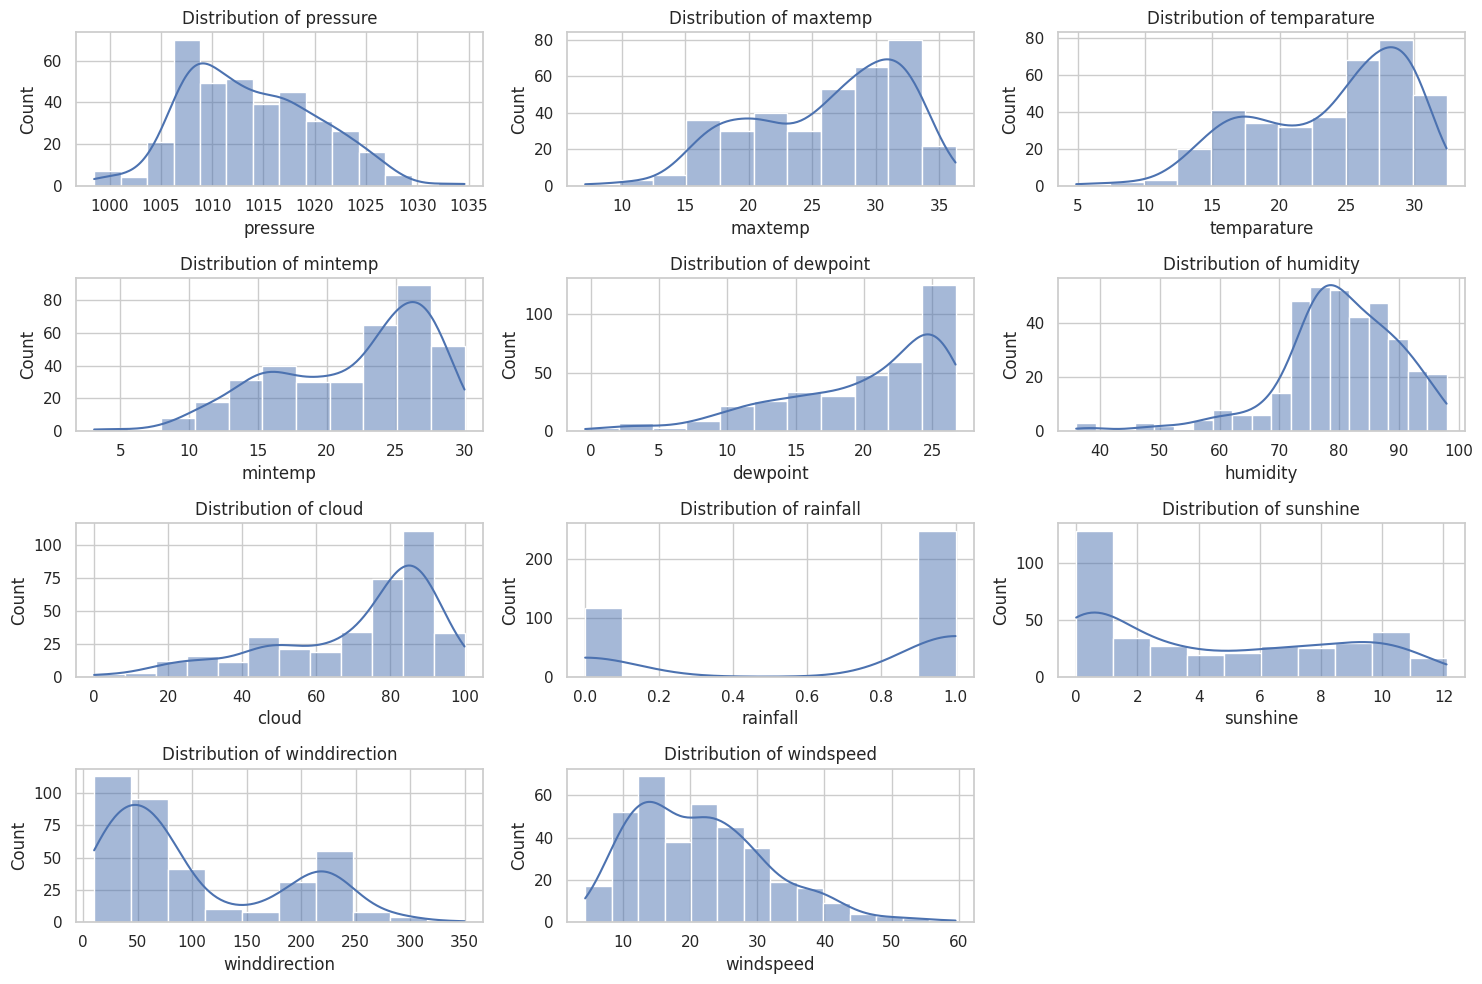

In [24]:
# Create the figure and adjust size
plt.figure(figsize=(15, 10))

# Define the features you want to plot
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
            'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']

# Iterate over the columns and create histograms with KDE for each
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Positioning the subplot
    sns.histplot(df[column], kde=True)  # Apply the darkened color
    plt.title(f"Distribution of {column}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

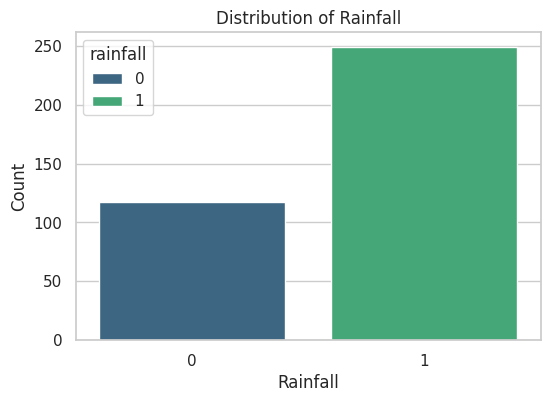

In [25]:
# Create the figure and adjust size
plt.figure(figsize=(6, 4))

# Create the countplot with Viridis palette
sns.countplot(data=df, x='rainfall', palette='viridis',hue = 'rainfall')

# Adding titles and labels for better readability
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Count')

# Show the plot
plt.show()


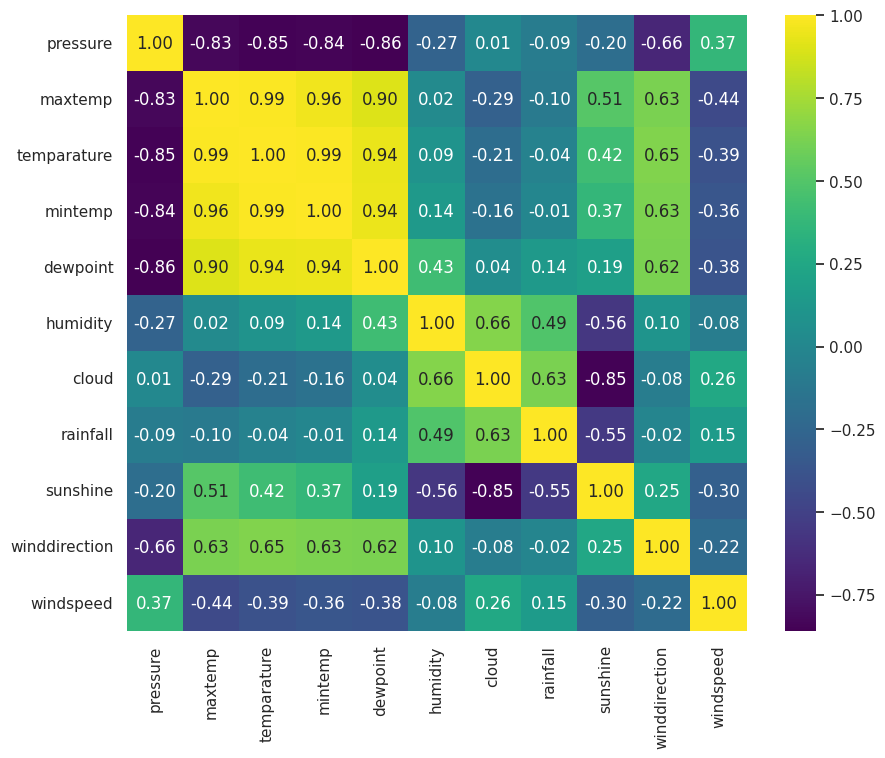

In [26]:
#Create the figure and adjust size
plt.figure(figsize=(10,8))

# Calculate the correlation matrix
corr = df.corr()

# Create the heatmap with the Viridis color palette
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', cbar=True)

# Show the plot
plt.show()

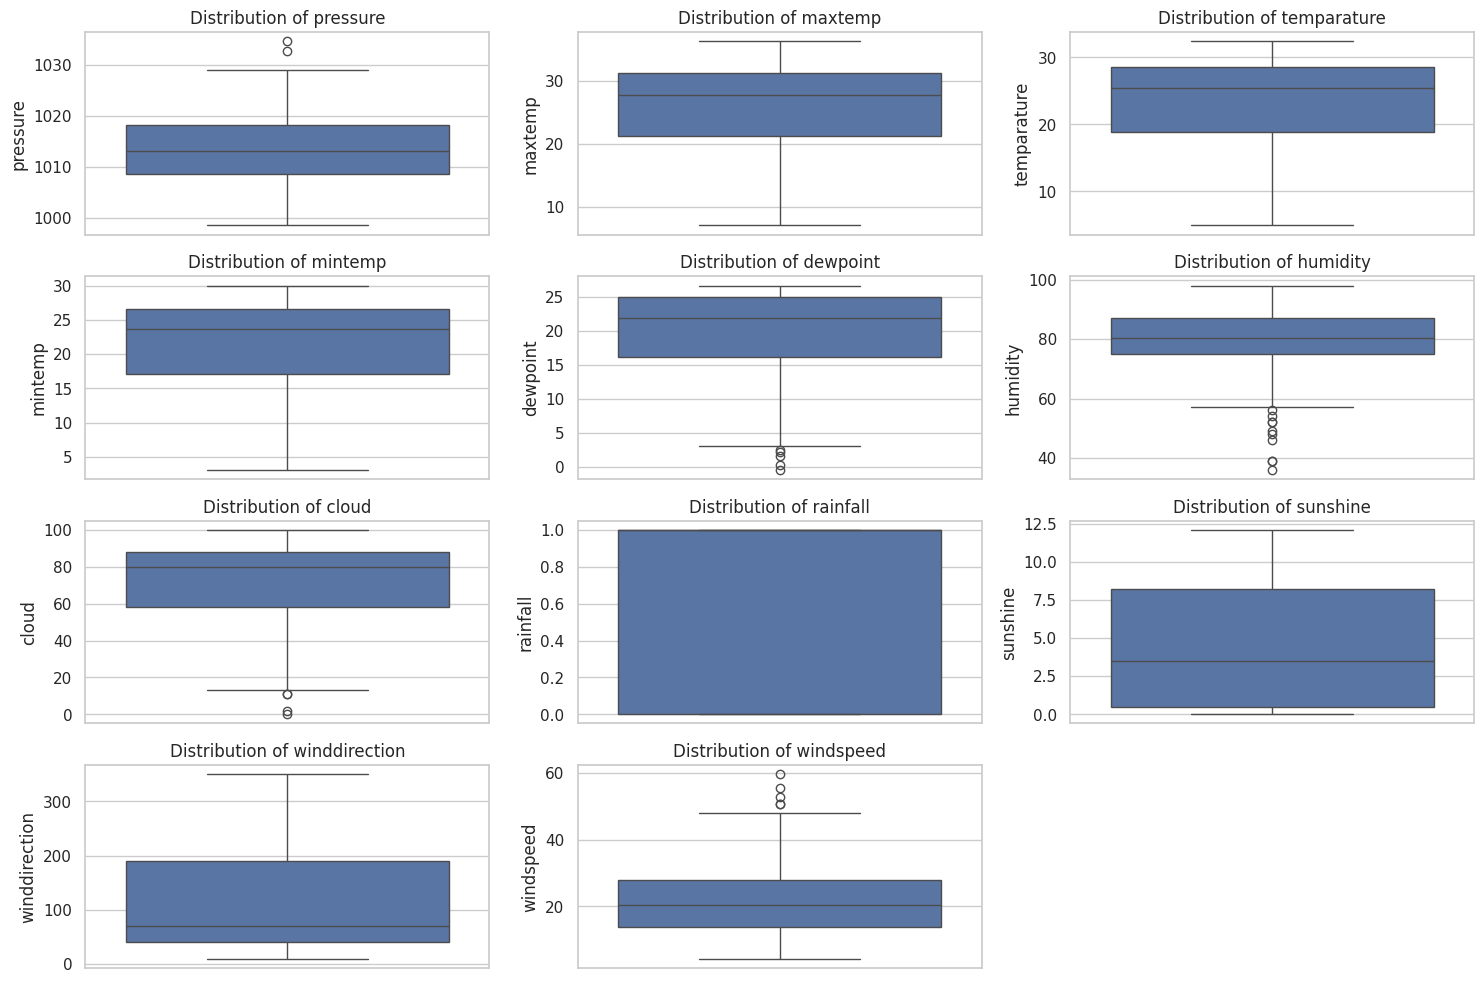

In [27]:
# Create the figure and adjust size
plt.figure(figsize=(15, 10))

# Define the features you want to plot
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
            'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']

# Iterate over the columns and create histograms with KDE for each
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Positioning the subplot
    sns.boxplot(df[column])  # Apply the darkened color
    plt.title(f"Distribution of {column}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## STEP 4: Data Preprocessing

In [28]:
# Check the column names in the DataFrame
print(df.columns)

# Drop the columns if they exist
columns_to_drop = ["maxtemp", "temparature", "mintemp"]  # Corrected potential typo

# Ensure the columns exist before attempting to drop them
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Verify the change
print(df.columns)


Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')
Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')


In [29]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [30]:
print(df["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [31]:
df_majority = df[df["rainfall"] == 1]
df_minority = df[df["rainfall"] == 0]

In [32]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [33]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

In [34]:
df_majority_downsampled .shape

(117, 8)

In [35]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [36]:
df_downsampled.shape

(234, 8)

In [37]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [38]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [41]:
#Split features nd target as X and Y
X = df_downsampled.drop(columns = ["rainfall"])
Y = df_downsampled["rainfall"]

In [45]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
188    1005.9      25.6        77     53      10.5          270.0       11.3
9      1017.5      15.5        85     91       0.0           70.0       37.7
137    1012.3      20.1        80     86       0.3           80.0       39.5
89     1018.3      16.3        79     89       2.4           40.0       14.8
157    1008.8      24.7        91     80       2.2           20.0       11.2
..        ...       ...       ...    ...       ...            ...        ...
351    1025.9      -0.4        39     25       9.1           20.0       35.6
352    1026.4       3.1        48     11       9.5           40.0       25.2
353    1025.4       8.7        62     71       2.1           30.0       29.0
360    1020.6      13.3        74     87       0.6           30.0       21.6
365    1026.4      13.0        74     66       5.7           20.0       23.3

[234 rows x 7 columns]


In [46]:
print(Y)

188    1
9      1
137    1
89     1
157    1
      ..
351    0
352    0
353    0
360    0
365    0
Name: rainfall, Length: 234, dtype: int64


In [47]:
# Splitting the data to training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 2)

## Model !: Random Forest Classifier

In [48]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf= {
    'n_estimators': [50,100,200],
    "max_features" : ["sqrt","log2"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}


In [49]:
#Hyper tuning using grid search
grid_search_rf = GridSearchCV(estimator = rf_model,param_grid = param_grid_rf,cv = 5,n_jobs = -1,verbose = 2)
grid_search_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [52]:
best_rf_model = grid_search_rf.best_estimator_
print(best_rf_model)

RandomForestClassifier(min_samples_leaf=4, n_estimators=200, random_state=42)


## STEP 5: Model Evaluation

In [53]:
cv_scores_rf = cross_val_score(best_rf_model,X_train,Y_train,cv = 5)
print('Cross Validation Score ', cv_scores_rf)
print('Mean Cross Validation Score ', cv_scores_rf.mean())


Cross Validation Score  [0.84210526 0.73684211 0.78378378 0.72972973 0.81081081]
Mean Cross Validation Score  0.7806543385490754


In [54]:
# Test set performance

y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(Y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.95      0.75      0.84        24
           1       0.79      0.96      0.86        23

    accuracy                           0.85        47
   macro avg       0.87      0.85      0.85        47
weighted avg       0.87      0.85      0.85        47



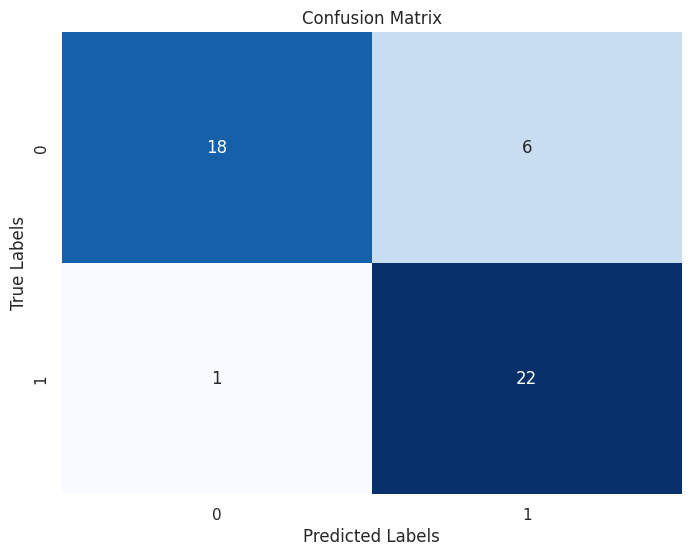

In [59]:
# Assuming Y_test and y_pred_rf are already defined
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # Use cmap for color palette
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [64]:
# Find the Accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.851063829787234


In [69]:
# Accuracy in percentage
accuracy_rf_percentage = (accuracy_rf * 100)

print(accuracy_rf_percentage)

85.1063829787234
